In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 17:26:21] [setup] RAM Tracking...
[codecarbon INFO @ 17:26:21] [setup] CPU Tracking...
[codecarbon WARNING @ 17:26:24] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:26:26] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 17:26:26] [setup] GPU Tracking...
[codecarbon INFO @ 17:26:26] No GPU found.
[codecarbon INFO @ 17:26:26] >>> Tracker's metadata:
[codecarbon INFO @ 17:26:26]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 17:26:26]   Python version: 3.9.12
[codecarbon INFO @ 17:26:26]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 17:26:26]   Available RAM : 8.000 GB
[codecarbon INFO @ 17:26:26]   CPU count: 8
[codecarbon INFO @ 17:26:26]   CPU model: Apple M1
[codecarbon INFO @ 17:26:26]   GPU count: None
[codecarbon INFO @ 17:26:26]   GPU model: None
[codecarbon INFO @ 17:26:27] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhoomikavalani/donateacrycorpusfeaturesdataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2


In [4]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [5]:
import re

def extraer_info_mejorada(ruta):
    # Extrae con regex el patrón típico del final del nombre del archivo
    match = re.search(r'-([\d.]+)-(m|f)-(\d+)-', ruta)
    if match:
        # match.groups() devuelve (edad_raw, genero, edad_clasificada)
        edad_raw, genero, edad = match.groups()
        return genero, edad
    else:
        return None, None  # si no encuentra patrón, deja como None

df[['Genero', 'Edad_Codigo']] = df['Cry_Audio_File'].apply(lambda x: pd.Series(extraer_info_mejorada(x)))

df['Genero'] = df['Genero'].map({'m': 0, 'f': 1})

edad_map = {
    '04': 1,
    '48': 2,
    '26': 3,
    '72': 4,
    '22': 5
}

df['Edad'] = df['Edad_Codigo'].map(edad_map)

df.drop(columns=['Cry_Audio_File', 'Edad_Codigo'], inplace=True)

In [6]:
df.head()

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13,Genero,Edad
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095,0,3
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785,1,3
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083,0,1
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483,0,4
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437,0,4


PREPROCESADO

In [7]:
df.shape

(457, 28)

In [8]:
col_names = df.columns

col_names

Index(['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean',
       'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean',
       'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2',
       'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9',
       'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13', 'Genero', 'Edad'],
      dtype='object')

In [9]:
df['Cry_Reason'].value_counts()

3    382
2     27
4     24
0     16
1      8
Name: Cry_Reason, dtype: int64

0 - belly pain
1 - burping
2 - discomfort
3 - hungry
4 - tired

In [10]:
#imbalanced data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cry_Reason               457 non-null    int64  
 1   Amplitude_Envelope_Mean  457 non-null    float64
 2   RMS_Mean                 457 non-null    float64
 3   ZCR_Mean                 457 non-null    float64
 4   STFT_Mean                457 non-null    float64
 5   SC_Mean                  457 non-null    float64
 6   SBAN_Mean                457 non-null    float64
 7   SCON_Mean                457 non-null    float64
 8   MFCCs13Mean              457 non-null    float64
 9   delMFCCs13               457 non-null    float64
 10  del2MFCCs13              457 non-null    float64
 11  MelSpec                  457 non-null    float64
 12  MFCCs20                  457 non-null    float64
 13  MFCCs1                   457 non-null    float64
 14  MFCCs2                   4

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [12]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 28 numerical variables

The numerical variables are : ['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean', 'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean', 'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2', 'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9', 'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13', 'Genero', 'Edad']


In [13]:
# view the numerical variables

df[numerical].head()

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13,Genero,Edad
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095,0,3
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785,1,3
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083,0,1
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483,0,4
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437,0,4


In [14]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Cry_Reason                 0
Amplitude_Envelope_Mean    0
RMS_Mean                   0
ZCR_Mean                   0
STFT_Mean                  0
SC_Mean                    0
SBAN_Mean                  0
SCON_Mean                  0
MFCCs13Mean                0
delMFCCs13                 0
del2MFCCs13                0
MelSpec                    0
MFCCs20                    0
MFCCs1                     0
MFCCs2                     0
MFCCs3                     0
MFCCs4                     0
MFCCs5                     0
MFCCs6                     0
MFCCs7                     0
MFCCs8                     0
MFCCs9                     0
MFCCs10                    0
MFCCs11                    0
MFCCs12                    0
MFCCs13                    0
Genero                     0
Edad                       0
dtype: int64

In [15]:
# view summary statistics in numerical variables

print((df[numerical].describe()),2)

       Cry_Reason  Amplitude_Envelope_Mean    RMS_Mean    ZCR_Mean  \
count  457.000000               457.000000  457.000000  457.000000   
mean     2.853392                 0.051791    0.020425    0.094088   
std      0.690120                 0.041558    0.017054    0.027277   
min      0.000000                 0.000504    0.000187    0.032646   
25%      3.000000                 0.018715    0.006875    0.073336   
50%      3.000000                 0.040515    0.016071    0.092543   
75%      3.000000                 0.073548    0.029639    0.111112   
max      4.000000                 0.212100    0.096381    0.183001   

        STFT_Mean      SC_Mean   SBAN_Mean   SCON_Mean  MFCCs13Mean  \
count  457.000000   457.000000  457.000000  457.000000   457.000000   
mean     0.723645  1208.523108  559.457103   26.671653   -43.967221   
std      1.006595   271.103944  102.135948    2.575177     6.841562   
min      0.000098   548.434286  272.392864   15.047119   -72.727020   
25%      0.082

Normalización usando el Scaler estándar

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop(columns=['Cry_Reason'])  # Características
y = df['Cry_Reason']  # Etiqueta de clase

X_scaled = scaler.fit_transform(X)  # Normalizamos solo las características


In [17]:
X = X_scaled

Dividimos en train y test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
#20% test, 80% training
X_train.shape, X_test.shape

((365, 27), (92, 27))

Como los datos están extremadamente imbalanceados, utilizamos SMOTE para corregirlo

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
import pandas as pd

print("Distribución de clases después de SMOTE:\n", pd.Series(y_train).value_counts())

Distribución de clases después de SMOTE:
 3    303
2    303
0    303
4    303
1    303
Name: Cry_Reason, dtype: int64


In [22]:
import pandas as pd

# Convertir X_train y X_test en DataFrames con sus nombres de columnas originales
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=['Cry_Reason']).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=['Cry_Reason']).columns)

In [23]:
# Convertir y_train y y_test en DataFrames
y_train_df = pd.DataFrame(y_train, columns=['Cry_Reason'])
y_test_df = pd.DataFrame(y_test, columns=['Cry_Reason'])


In [24]:
X_train = X_train_df
X_test = X_test_df

In [25]:
X_train.head()

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13,Genero,Edad
0,0.671965,0.917200,-0.089363,1.068821,1.485860,0.162491,1.093605,0.554701,-0.478529,-0.356147,...,0.672906,0.045418,-0.561544,0.742874,1.332760,1.275789,1.630091,1.246095,1.234853,1.318172
1,-0.920907,-0.844106,-1.300891,-0.668628,-1.177771,1.032481,1.854203,0.188730,1.143014,-0.304088,...,1.038113,0.710772,0.305871,0.713130,-0.379239,-0.475462,0.161929,-0.443259,1.234853,-1.230789
2,-0.940086,-0.913470,0.524344,-0.682145,0.405092,-0.070584,0.001422,-1.142677,1.474613,-0.926117,...,-0.131748,-0.261621,0.724243,0.966648,-0.292810,0.385945,0.463798,-1.134407,-0.809813,-1.230789
3,-0.923837,-0.855982,0.193428,-0.676451,1.541036,1.216193,-1.101974,-1.109154,0.630581,2.013489,...,0.385814,-0.784139,-0.425662,1.367564,1.403864,0.599912,0.789922,0.451399,-0.809813,0.468518
4,-0.796779,-0.756166,0.195744,-0.575354,0.014856,0.075377,-0.043089,-0.246578,-0.478529,-0.356147,...,1.149231,0.450801,-0.183717,0.319724,-0.696400,-1.058542,0.930600,1.729385,1.234853,1.318172


MODELO

In [26]:
#We now have X_train dataset ready to be fed into the Logistic Regression classifier
#Let's run SVM with default hyperparameters
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7935


LET'S TRY LINEAL KERNEL

In [27]:
#Let's try c=1 and kernel = linear
linear_svc=SVC(kernel='linear', C=1) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.4783


POLYNOMIAL KERNEL

In [28]:
# instantiate classifier with polynomial kernel and C=1
poly_svc=SVC(kernel='poly', C=1) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1 : 0.7174


In [29]:
# instantiate classifier with sigmoid kernel and C=1
sigmoid_svc100=SVC(kernel='sigmoid', C=1) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1 : 0.1957


We keep default kernel (RBF)

Let's try different values for C

Antes teníamos C=1, probamos C=50

In [30]:
#Default hyperparameter means kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


svc_rbf = SVC(kernel='rbf', C=20)
svc_rbf.fit(X_train, y_train.ravel())
y_pred_rbf = svc_rbf.predict(X_test)
print("Accuracy with RBF and C=20:", accuracy_score(y_test, y_pred_rbf))

Accuracy with RBF and C=20: 0.8152173913043478


C=20, porque a partir de 20 la accuracy no cambia, pero si mejora respecto a 1

Ajustemos el parámetro gamma

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for gamma_value in [0.01, 0.1, 1, 'scale', 'auto']:
    svc = SVC(kernel='rbf', C=20, gamma=gamma_value)
    svc.fit(X_train, y_train.ravel())
    y_pred = svc.predict(X_test)
    print(f"Accuracy with gamma={gamma_value}: {accuracy_score(y_test, y_pred):.4f}")


Accuracy with gamma=0.01: 0.7717
Accuracy with gamma=0.1: 0.8587
Accuracy with gamma=1: 0.8587
Accuracy with gamma=scale: 0.8152
Accuracy with gamma=auto: 0.8152


Gamma = 0.1 y gamma = 1 es igual de bueno para c=20

Probamos un valor intermedio

In [32]:
svc = SVC(kernel='rbf', C=20, gamma=0.5)
svc.fit(X_train, y_train.ravel())
y_pred = svc.predict(X_test)
print("Accuracy with gamma=0.5:", accuracy_score(y_test, y_pred))


Accuracy with gamma=0.5: 0.8586956521739131


Comprobamos si hay overfitting

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

svc_best = SVC(kernel='rbf', C=20, gamma=0.5)
svc_best.fit(X_train, y_train)
y_pred_best = svc_best.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Confusion Matrix:
 [[ 0  0  0  5  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0 79  0]
 [ 0  0  0  6  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.86      1.00      0.92        79
           4       0.00      0.00      0.00         6

    accuracy                           0.86        92
   macro avg       0.17      0.20      0.18        92
weighted avg       0.74      0.86      0.79        92



/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El dataset está extremadamente desbalanceado

🔹 3️⃣ Ajustes y experimentos realizados en SVM

Comenta que probaste class_weight='balanced', SMOTE, diferentes valores de C y gamma, y que aun así no mejoró.
Esto demuestra que hiciste una búsqueda exhaustiva de hiperparámetros.

🔹 4️⃣ Conclusión sobre SVM

Explica que SVM no maneja bien datasets altamente desbalanceados sin una representación suficiente de cada clase.

Hacemos gridsearchcv para evitar overfitting

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [34]:
print('Training set score: {:.4f}'.format(svc_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc_best.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8587


OVERFITTING MUY CLARO

Probamos CV

El dataset de entrenamiento se divide en 5 partes (5-fold cross-validation).

Se entrena el modelo 5 veces, cada vez dejando una de las partes para test y usando las demás para entrenamiento.

Se calcula la precisión (accuracy) en cada fold.

El resultado es una lista con 5 valores, cada uno representando la precisión obtenida en cada fold.


Primero, con gridsearchCV buscamos los parametros de c y gamma (pequeños) que nos den el minimo overfitting, pero sin llegar a causar underfitting

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Rejilla ajustada para buscar el equilibrio
param_grid = {
    'C': [0.05, 0.1, 0.2, 0.5],
    'gamma': [0.01, 0.03, 0.05, 0.07],
    'kernel': ['rbf']
}

# Búsqueda con validación cruzada
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados
print("🎯 Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("✅ Train score:", grid_search.best_estimator_.score(X_train, y_train))
print("📊 Test score:", grid_search.best_estimator_.score(X_test, y_test))

# Evaluación final
y_pred = grid_search.best_estimator_.predict(X_test)
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🎯 Mejores hiperparámetros encontrados: {'C': 0.5, 'gamma': 0.07, 'kernel': 'rbf'}
✅ Train score: 0.9900990099009901
📊 Test score: 0.8043478260869565

🧩 Confusion Matrix:
 [[ 3  0  0  1  1]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 1  1  3 71  3]
 [ 1  0  0  5  0]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.90      0.90      0.90        79
           4       0.00      0.00      0.00         6

    accuracy                           0.80        92
   macro avg       0.30      0.30      0.30        92
weighted avg       0.80      0.80      0.80        92



In [36]:
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='rbf', C=0.5, gamma=0.07)
scores = cross_val_score(svc, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.95379538 0.97029703 0.97029703 0.97359736 0.99339934]
Mean accuracy: 0.9722772277227723


In [37]:
# Importar la librería
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir el modelo
svc = SVC(kernel='rbf', C=0.5, gamma=0.07)

# Entrenar el modelo con los datos de entrenamiento
svc.fit(X_train, y_train.ravel())

# Calcular la precisión en el conjunto de entrenamiento
train_score = accuracy_score(y_train, svc.predict(X_train))

# Calcular la precisión en el conjunto de test
test_score = accuracy_score(y_test, svc.predict(X_test))

# Imprimir los resultados
print("Training set score: {:.4f}".format(train_score))
print("Test set score: {:.4f}".format(test_score))



Training set score: 0.9901
Test set score: 0.8043


Hay una diferencia de ~19% entre train y test, lo que sí sugiere cierto overfitting leve, pero:

Es mucho menor que el que tenías con C=30.

El test score es bastante sólido.

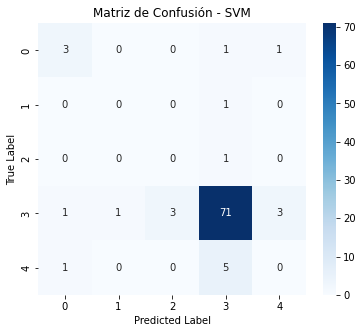

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de test
y_pred = svc.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un heatmap con seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - SVM")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import numpy as np


# Obtener predicciones del modelo SVM
y_pred_svm = svc.predict(X_test)

# Calcular métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')


# Mostrar los resultados
print("Accuracy:", accuracy_svm)
print("Sensibilidad (Recall):", recall_svm)
print("F1 Score:", f1_svm)


Accuracy: 0.8043478260869565
Sensibilidad (Recall): 0.8043478260869565
F1 Score: 0.8043478260869565


➡️ Como son idénticos, eso sugiere que las clases están bien balanceadas y el modelo está prediciendo de forma bastante uniforme.

In [40]:
from scipy.special import softmax
from sklearn.metrics import roc_auc_score

if hasattr(svc, "decision_function"):
    y_scores = svc.decision_function(X_test)
    y_proba_svm = softmax(y_scores, axis=1)  # Convertir scores en probabilidades
    auc_svm = roc_auc_score(y_test, y_proba_svm, multi_class='ovr')
    print("AUC (con softmax):", auc_svm)


AUC (con softmax): 0.669306216404975


In [41]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 17:26:37] Energy consumed for RAM : 0.000008 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:26:37] Energy consumed for all CPUs : 0.000014 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 17:26:37] 0.000022 kWh of electricity used since the beginning.


4.448374623103372e-06